In [61]:
import numpy as np 
import matplotlib.pyplot as plt

In [62]:
volume_filepath = '../data/clean/stdata12/stdata_12_amplitude.npy'
label_filepath = '../data/clean/stdata12/stdata_12_labels.npy'

volume = np.load(volume_filepath)
label = np.load(label_filepath)

In [63]:
volume.shape, label.shape

((4, 951, 362), (4, 951, 362))

In [64]:
np.unique(label)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.],
      dtype=float32)

In [65]:
np.min(volume), np.max(volume), np.mean(volume), np.std(volume) , np.max(np.abs(volume)), np.quantile(np.abs(volume), 0.99), np.median(volume)

(-28620.572, 25043.0, 5.7160597, 2715.3176, 28620.572, 8838.7060546875, 0.0)

In [66]:
# normalising the data to 99th percentile of abs_max and clipping to abs_max 
abs_max = abs(volume).max()
volume_norm = volume.clip(-abs_max, abs_max) / abs_max

In [67]:
# First inline: 190    Last inline: 490
# First xline:  300    Last xline:  1250

In [68]:
volume_npy = volume 
labels_npy = label

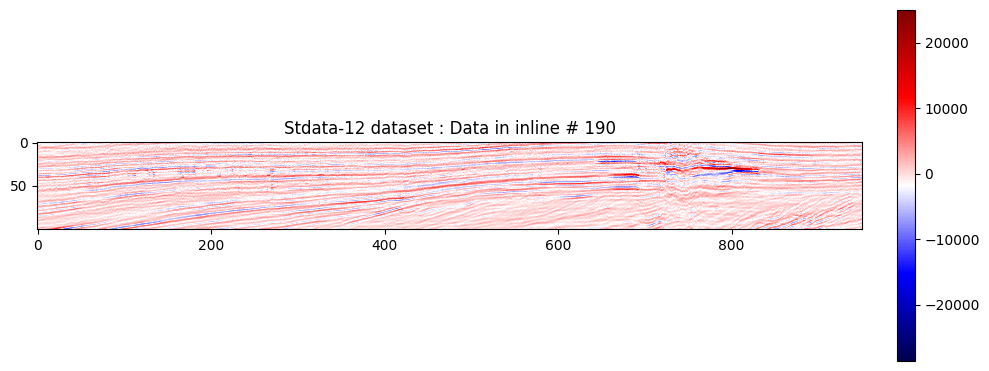

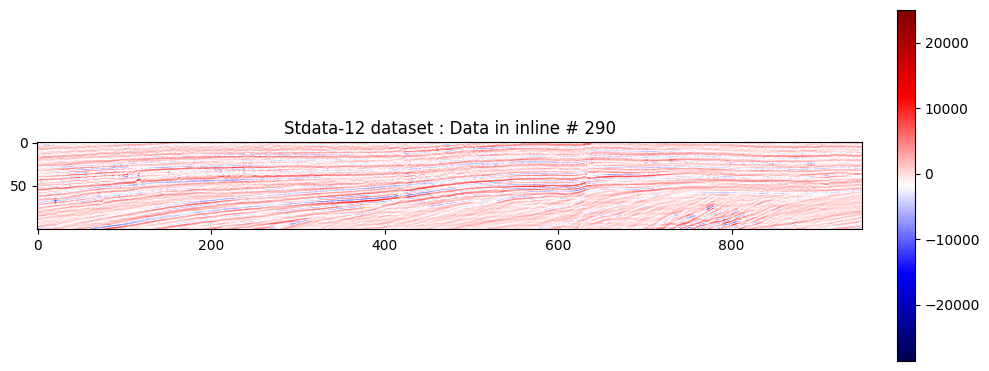

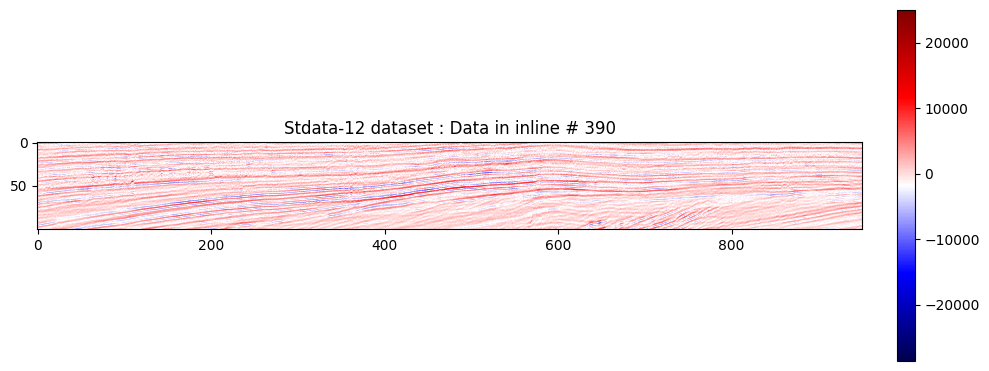

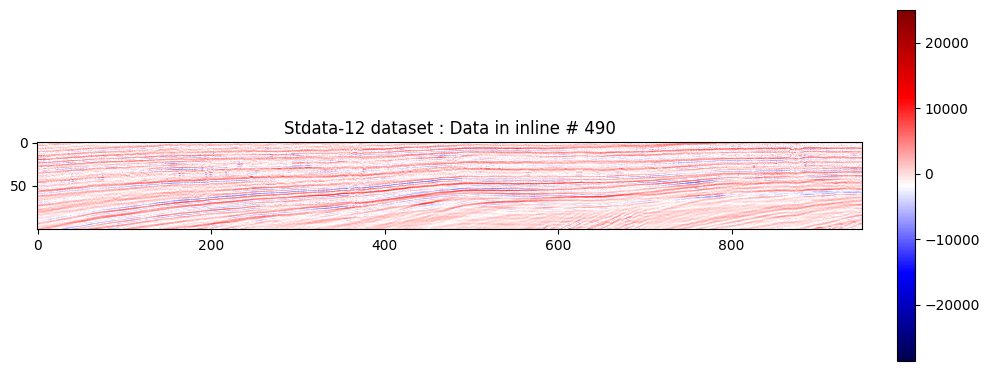

In [69]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(10,60))
plt.imshow(volume_npy[0].T[:100], cmap='seismic', vmin= np.min(volume_npy), vmax = np.max(volume_npy))
plt.colorbar(fraction=0.020, pad=0.04)
plt.title("Stdata-12 dataset : Data in inline # 190")
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10,60))
plt.imshow(volume_npy[1].T[:100], cmap='seismic', vmin= np.min(volume_npy), vmax = np.max(volume_npy))
plt.colorbar(fraction=0.020, pad=0.04)
plt.title("Stdata-12 dataset : Data in inline # 290")
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10,60))
plt.imshow(volume_npy[2].T[:100], cmap='seismic', vmin= np.min(volume_npy), vmax = np.max(volume_npy))
plt.colorbar(fraction=0.020, pad=0.04)
plt.title("Stdata-12 dataset : Data in inline # 390")
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10,60))
plt.imshow(volume_npy[3].T[:100], cmap='seismic', vmin= np.min(volume_npy), vmax = np.max(volume_npy))
plt.colorbar(fraction=0.020, pad=0.04)
plt.title("Stdata-12 dataset : Data in inline # 490")
plt.tight_layout()
plt.show()

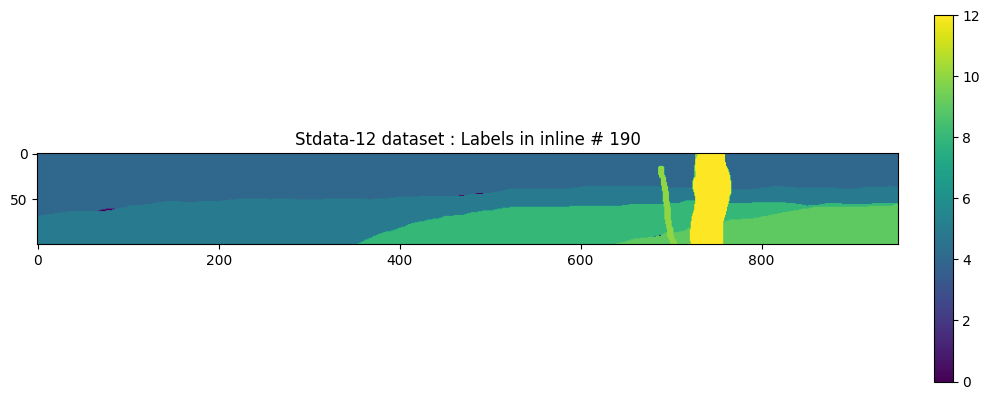

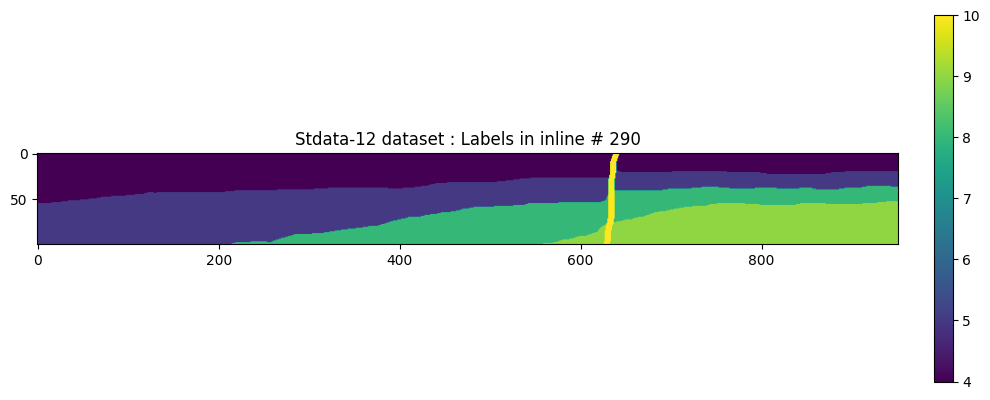

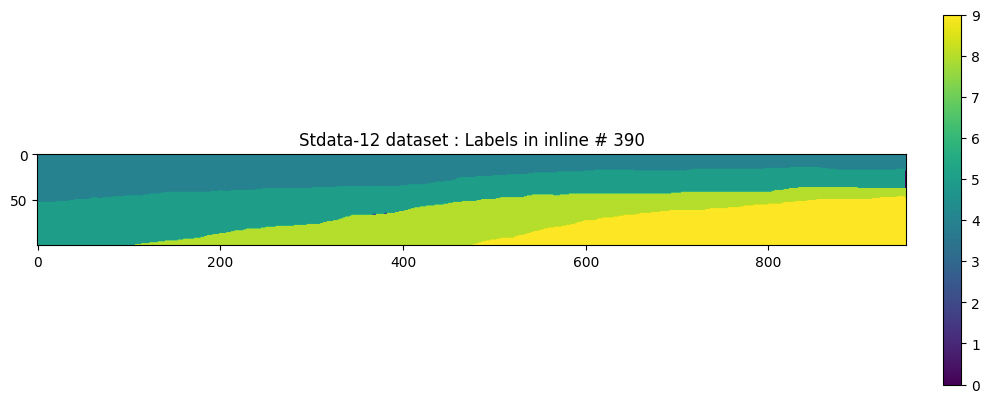

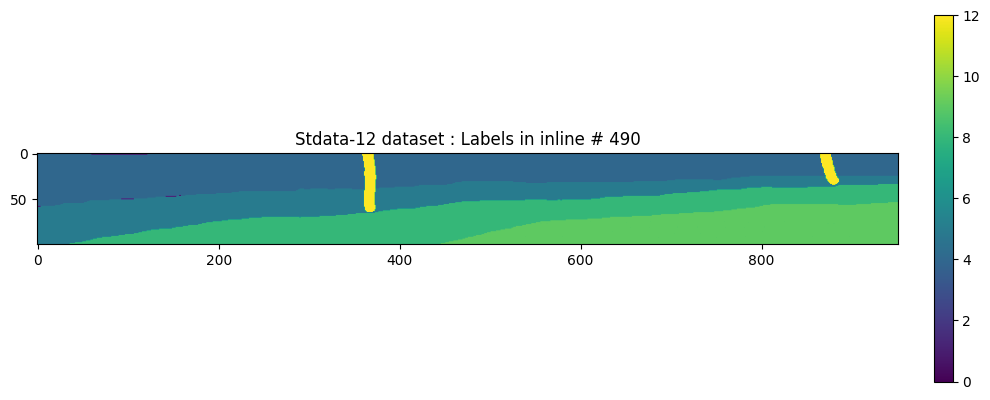

In [70]:
# sample labels 
fig = plt.figure(figsize=(10,60))
plt.imshow(labels_npy[0].T[:100])
plt.colorbar(fraction=0.020, pad=0.04)
plt.tight_layout()
plt.title("Stdata-12 dataset : Labels in inline # 190")
plt.show()

fig = plt.figure(figsize=(10,60))
plt.imshow(labels_npy[1].T[:100])
plt.colorbar(fraction=0.020, pad=0.04)
plt.tight_layout()
plt.title("Stdata-12 dataset : Labels in inline # 290")
plt.show()


fig = plt.figure(figsize=(10,60))
plt.imshow(labels_npy[2].T[:100])
plt.colorbar(fraction=0.020, pad=0.04)
plt.tight_layout()
plt.title("Stdata-12 dataset : Labels in inline # 390")
plt.show()

fig = plt.figure(figsize=(10,60))
plt.imshow(labels_npy[3].T[:100])
plt.colorbar(fraction=0.020, pad=0.04)
plt.tight_layout()
plt.title("Stdata-12 dataset : Labels in inline # 490")
plt.show()

Class label :0.0 Count : 961
Class label :1.0 Count : 204
Class label :2.0 Count : 146730
Class label :3.0 Count : 139530
Class label :4.0 Count : 134685
Class label :5.0 Count : 128714
Class label :6.0 Count : 237106
Class label :7.0 Count : 197457
Class label :8.0 Count : 132205
Class label :9.0 Count : 161203
Class label :10.0 Count : 21482
Class label :11.0 Count : 62387
Class label :12.0 Count : 14384


Text(0.5, 1.0, 'Stdata-12: Class Distribution')

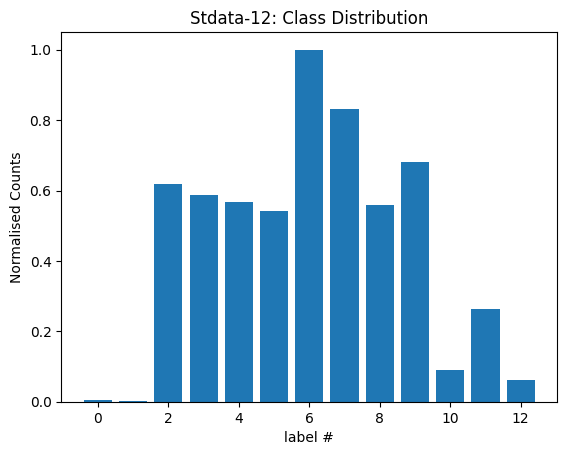

In [71]:
# Distribution of class labels 

labels = np.unique(labels_npy).tolist()
labels

counts = []
for label in labels : 
    count = labels_npy[labels_npy == label].shape[0]
    print(f'Class label :{label}','Count :', count )
    counts.append(count)
    
normalised_counts = [x / max(counts) for x in counts]
plt.bar(labels, normalised_counts, )
plt.xlabel('label #')
plt.ylabel('Normalised Counts')
plt.title("Stdata-12: Class Distribution")

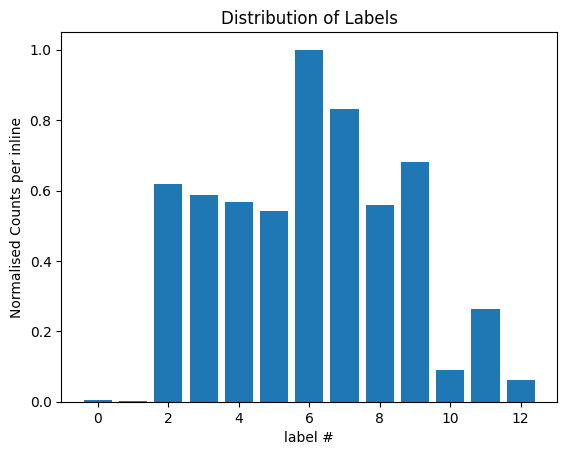

In [72]:
# Mean Distribution of classes in an a typical inline ( class coverage )
# i.e total count by inline image size 
mean_counts_inline = [x / volume_npy.shape[0] / volume_npy.shape[1] for x in counts ]
mean_counts_inline_normalised = [ x / max(mean_counts_inline) for x in mean_counts_inline]

plt.bar(labels, mean_counts_inline_normalised, )
plt.xlabel('label #')
plt.ylabel('Normalised Counts per inline')
plt.title("Distribution of Labels");

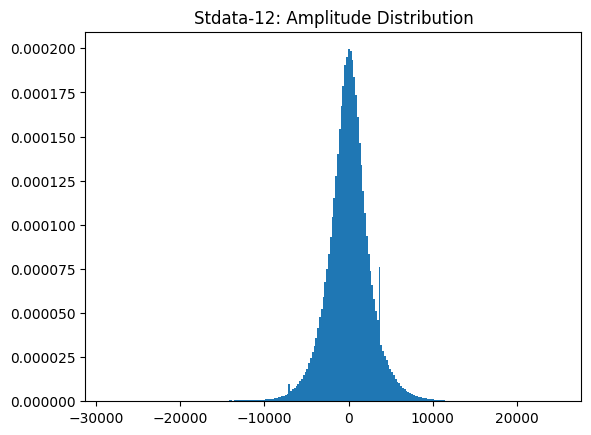

In [73]:
# distrbution of data 
plt.figure('Data Probability Distribution')
plt.hist(volume_npy.reshape(-1), bins=250,density=True)
plt.title("Stdata-12: Amplitude Distribution")
plt.show()

(4, 951, 362) [0. 1.]


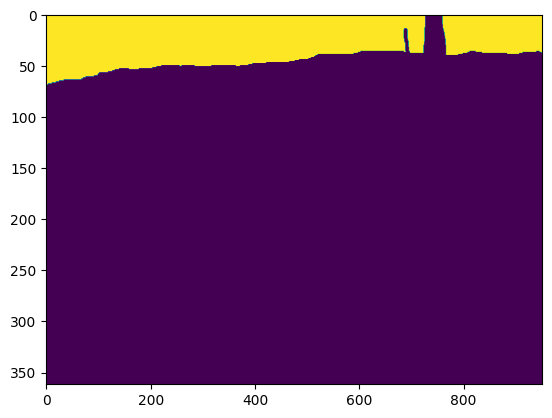

In [74]:
# selecting data of each class 
from copy import deepcopy 

def class_mask(label_npy, label) :
    label_npy = deepcopy(label_npy)
    condition = (label_npy == label)
    label_npy[condition] = 1 
    label_npy[~condition] = 0
    return label_npy

# sample plot 

label = 4

label_mask = class_mask(labels_npy, label)
print(label_mask.shape,np.unique(label_mask))
plt.imshow(label_mask[0].T, aspect='auto')

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]

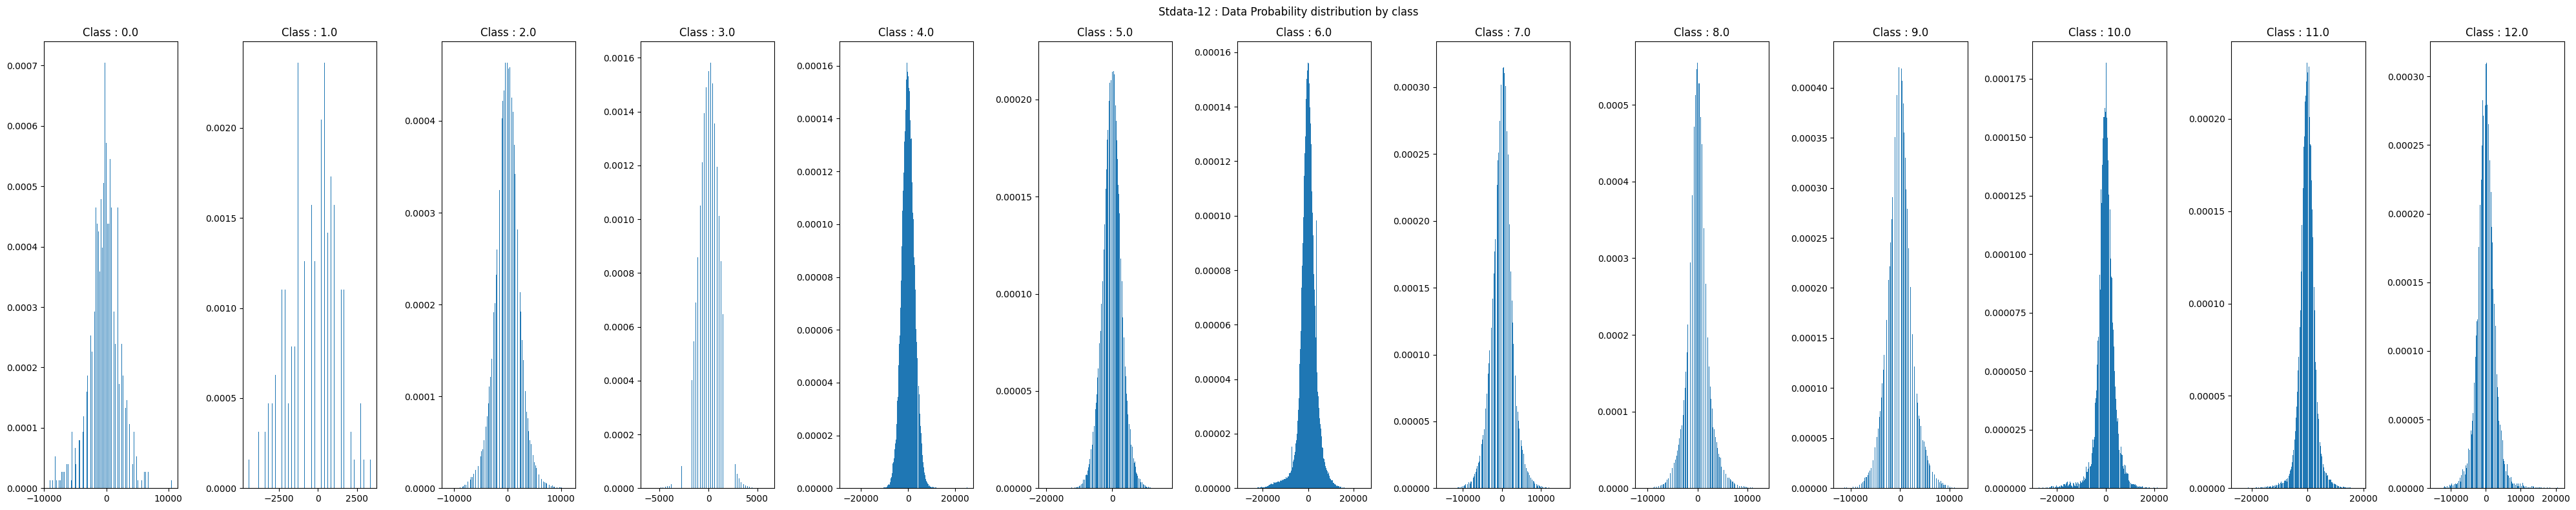

In [78]:
# distribution of data in each class

# data filtered by class 

def data_by_class(volume_npy,labels_npy,label) : 
    label_mask = class_mask(labels_npy, label)
    positions = np.where(label_mask == 1)
    return volume_npy[positions]

# data distribution by class
display(labels)
fig, ax = plt.subplots(ncols=len(labels), figsize=(40,8))
for i,label in enumerate(labels) : 
    volume = data_by_class(volume_npy, labels_npy, label)
    ax[i].hist(volume, bins=250, density=True)
    ax[i].set_title(f'Class : {label}')


plt.suptitle('Stdata-12 : Data Probability distribution by class')
plt.tight_layout()

plt.show()